In [70]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [71]:
df = pd.read_csv('../Datasets/merged_alpha.csv')

In [72]:
df = df.drop(columns=["Model", "Stnd Description", "Underhood ID", "SmartWay"])

In [73]:
df

,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,Comb CO2
0,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,small car,3,24,34,28,6,316
1,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,small car,3,24,34,28,6,316
2,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,small SUV,3,26,27,27,6,330
3,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,small SUV,3,26,27,27,6,330
4,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,small SUV,3,20,27,23,5,387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14866,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,T3B70,standard SUV,5,22,27,24,5,369
14867,2.0,4.0,SemiAuto-8,4WD,Gasoline,CA,L3SULEV30,standard SUV,7,20,26,23,5,393
14868,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,T3B30,standard SUV,7,20,26,23,5,393
14869,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,standard SUV,7,26/59,27/57,27/58,9,137


In [74]:
df["Greenhouse Gas Score"].value_counts()

Greenhouse Gas Score
5     3838
4     3318
3     2248
6     1556
10    1411
7      889
2      771
8      370
1      242
9      228
Name: count, dtype: int64

In [75]:
def split_values(value):
    split_values = value.split('/')
    return split_values[0]


df['City MPG'] = df['City MPG'].apply(split_values)
df['Hwy MPG']= df['Hwy MPG'].apply(split_values)
df['Cmb MPG']= df['Cmb MPG'].apply(split_values)
df['Comb CO2'] = df['Comb CO2'].apply(split_values)


In [76]:
cols = ['Displ', 'Cyl', 'Greenhouse Gas Score', 'Comb CO2', 'City MPG']

df[cols] = df[cols].astype('float')

for col in cols:
    quartiles = df[col].quantile([0.2, 0.7])
    q1 = quartiles.loc[0.2]
    q3 = quartiles.loc[0.7]

    low_bound = q1 - 1.5 * (q3 - q1)
    upp_bound = q3 + 1.5 * (q3 - q1)

    df = df[(df[col] >= low_bound) & (df[col] <= upp_bound)]


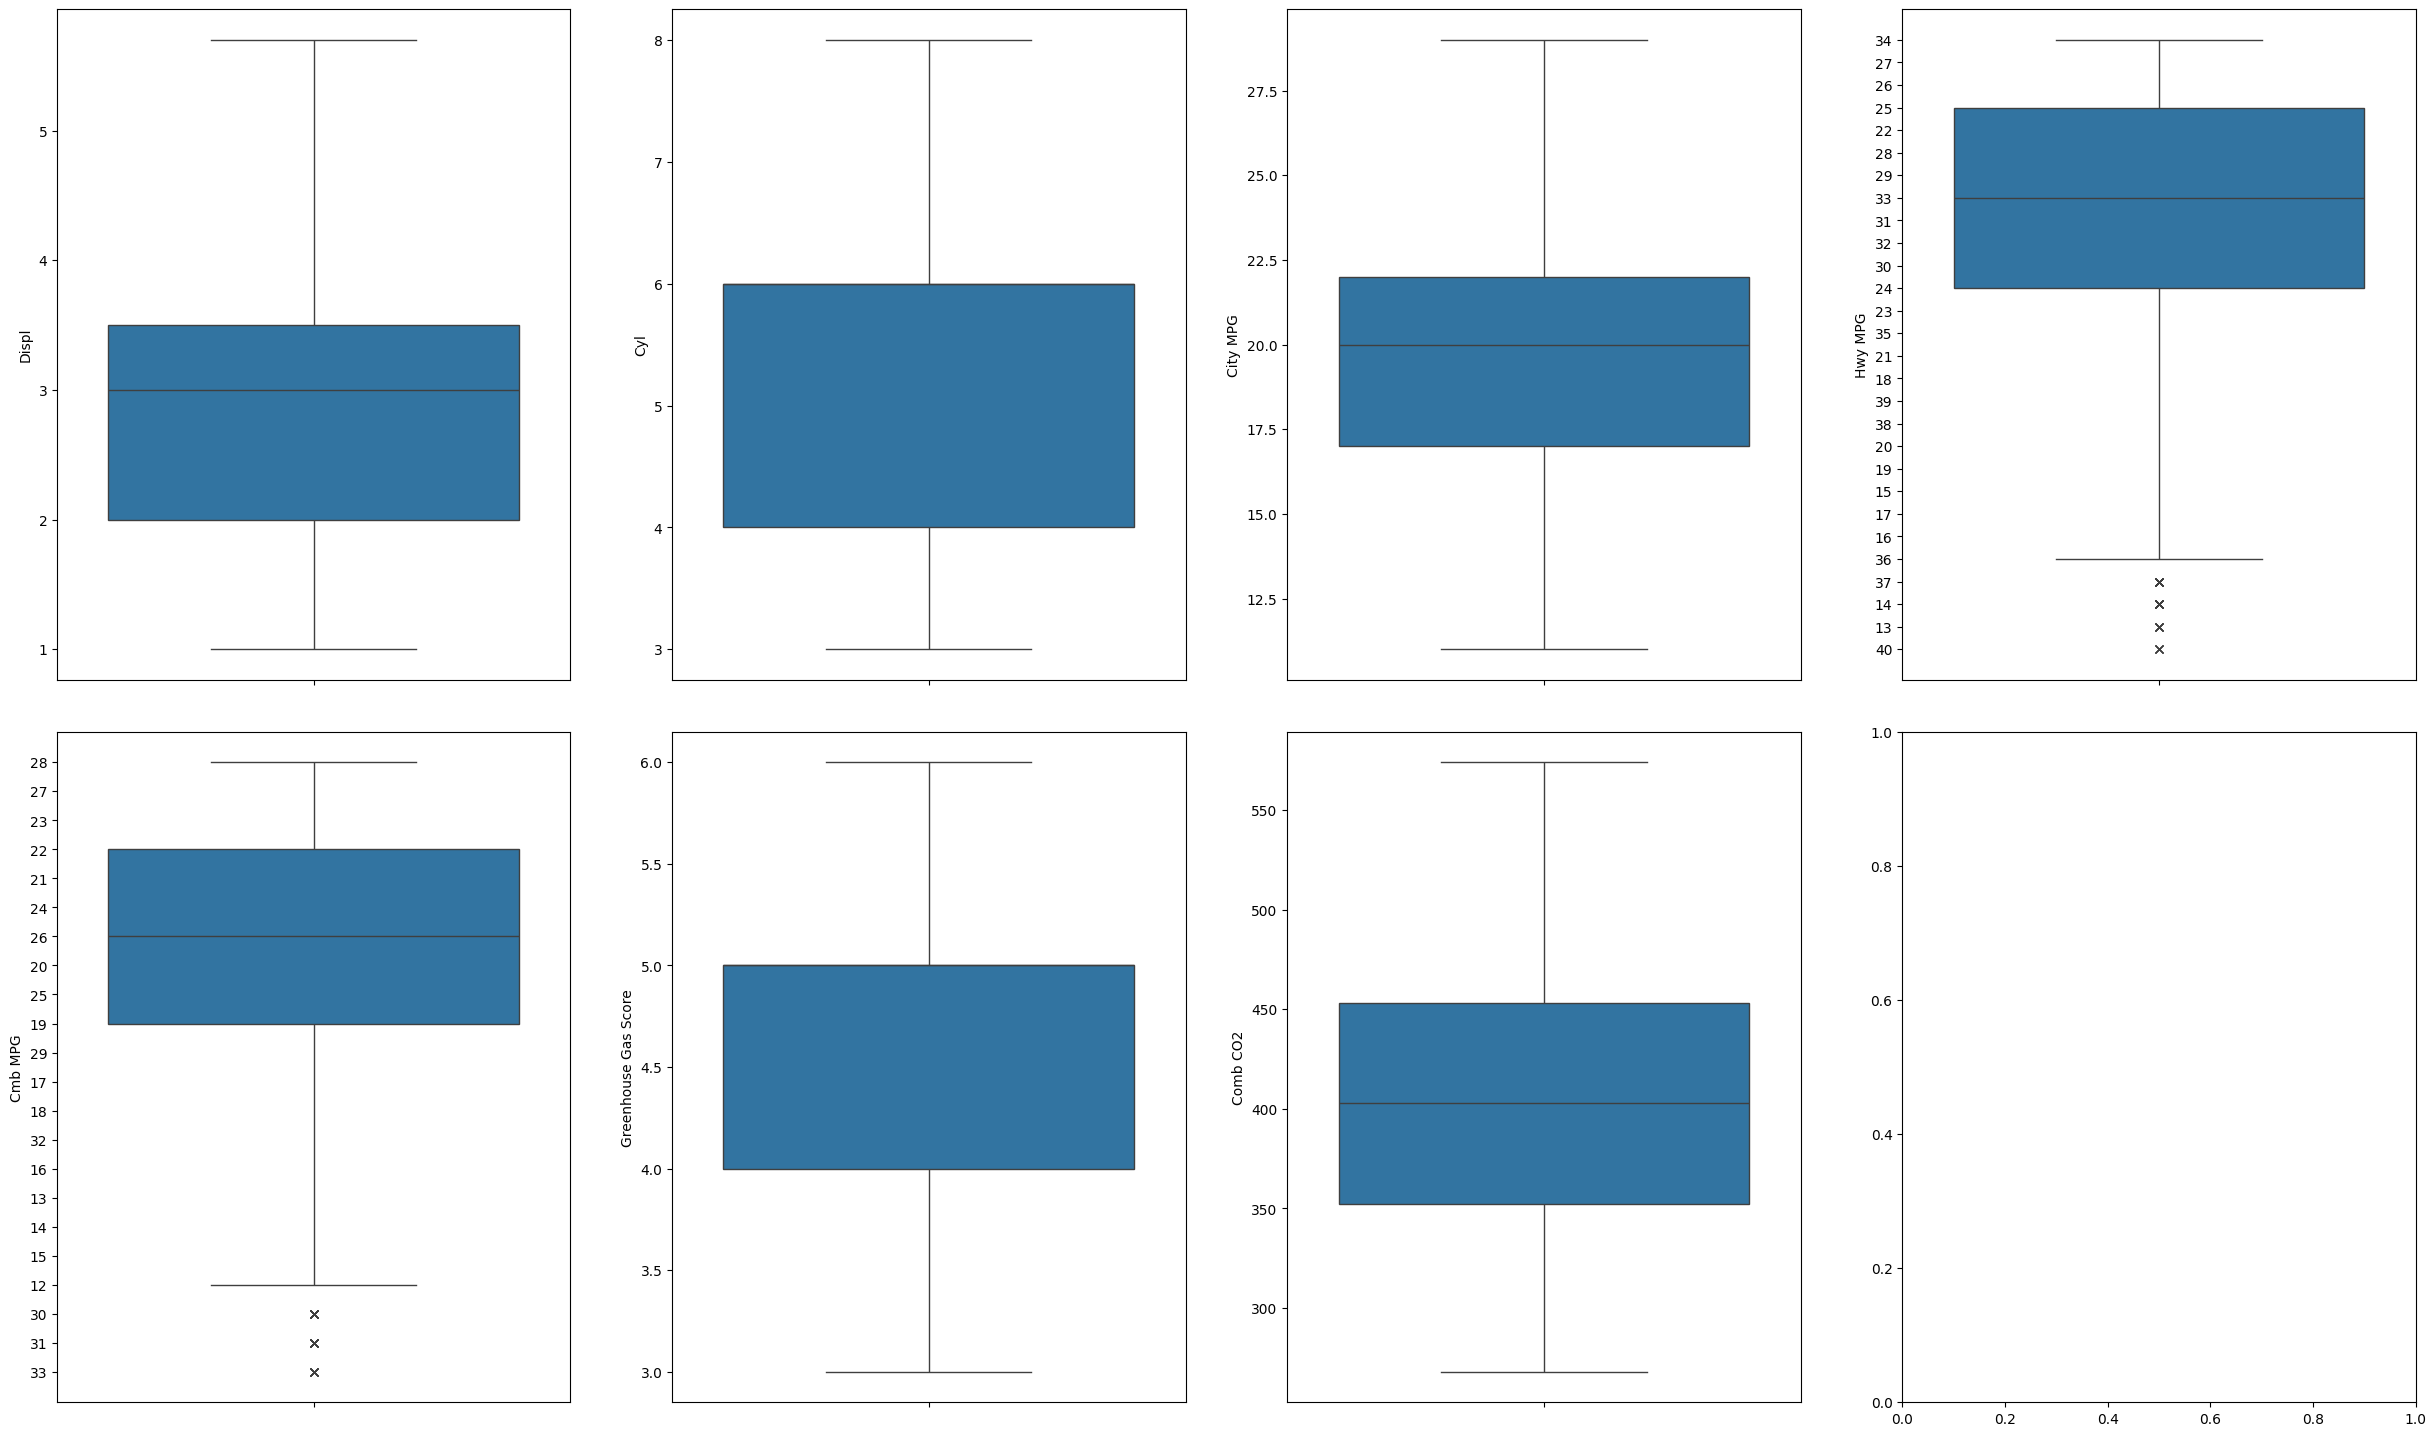

In [77]:
fig, axes = plt.subplots(2, 4, figsize=(25, 15))


sns.boxplot(df['Displ'], flierprops={"marker": "x"}, ax=axes[0, 0])

sns.boxplot(df['Cyl'], flierprops={"marker": "x"}, ax=axes[0, 1])

sns.boxplot(df['City MPG'], flierprops={"marker": "x"}, ax=axes[0, 2])

sns.boxplot(df['Hwy MPG'], flierprops={"marker": "x"}, ax=axes[0, 3])

sns.boxplot(df['Cmb MPG'], flierprops={"marker": "x"}, ax=axes[1, 0])

sns.boxplot(df['Greenhouse Gas Score'], flierprops={"marker": "x"}, ax=axes[1, 1])

sns.boxplot(df['Comb CO2'], flierprops={"marker": "x"}, ax=axes[1, 2])

plt.tight_layout(pad=3)

plt.show()

In [78]:
df = df.dropna()

Label Encoding Categorical Columns

In [80]:
cols = ["Trans", "Drive", "Veh Class", "Stnd", "Fuel", "Cert Region"]

def label_encode(df, columns_to_encode):
    for column in columns_to_encode:
        le = LabelEncoder()
        df.loc[:, column] = le.fit_transform(df[column])

    return df

df = label_encode(df, cols)


df = df.astype('float')

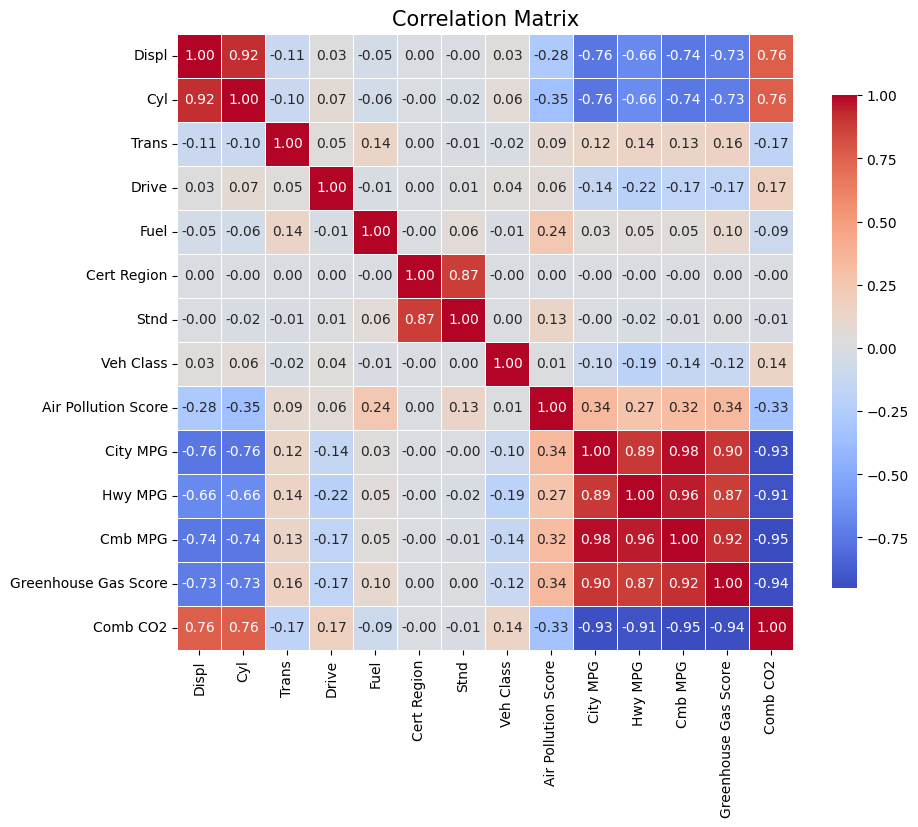

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', size=15)
plt.show()


In [82]:
df = df.drop(columns=['Cyl', 'Greenhouse Gas Score', 'Hwy MPG', 'Cmb MPG', "Cert Region"])

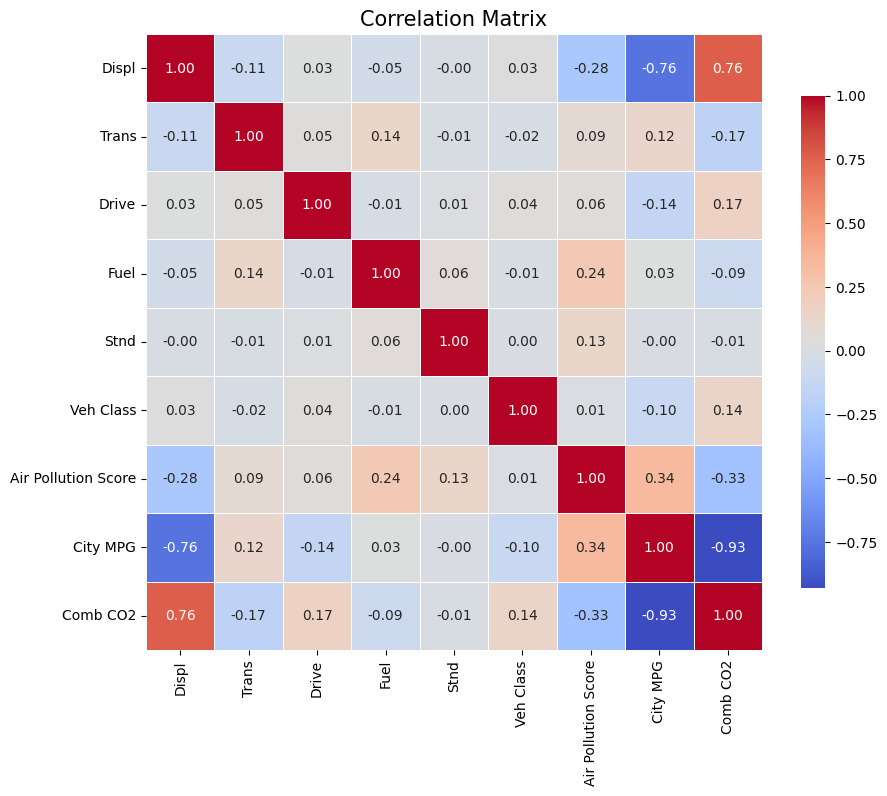

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', size=15)
plt.show()


In [84]:
df.to_csv('../Cleaned Datasets/emissions_cleaned.csv', index=False)